# Análise das doses aplicadas


Importação das bibliotecas as quais serão utilizadas no desenvolvimento da análise e dos dados a serem analisados.


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('vacinados.csv',sep=';',encoding ='UTF-8',header = 0)
data

,cpf,nome,sexo,grupo,vacina,lote,dose,data_vacinacao,local_vacinacao
0,***.574.544-**,AABAN VASCONCELOS ZYZZYAG,MASCULINO,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),219VCD270W,2.0,2021-10-19,DRIVE THRU PARQUE DE EXPOSIÇÃO
1,***.574.544-**,AABAN VASCONCELOS ZYZZYAG,MASCULINO,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),216VCD206Z,1.0,2021-07-26,DRIVE THRU PARQUE DE EXPOSIÇÃO
2,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210043,2.0,2021-03-04,CENTRO DE VACINAÇÃO PARQUE DE EXPOSIÇÃO
3,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210016,1.0,2021-02-11,CENTRO DE VACINAÇÃO COMPAZ MIGUEL ARRAES
4,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,3 - COMIRNATY (PFIZER),32010BD,3.0,2021-10-07,CENTRO DE VACINAÇÃO UNINASSAU
...,...,...,...,...,...,...,...,...,...
3407293,***.619.454-**,NECIRA FERREIRA DE SANTANA,FEMININO,IDOSOS,3 - COMIRNATY (PFIZER),FF8848,3.0,2021-09-29,DRIVE THRU - BIG BOMPREÇO - BOA VIAGEM
3407294,***.705.064-**,SEVERINO MANOEL DE SANTANA,MASCULINO,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),210052A,2.0,2021-03-11,DRIVE THRU GERALDÃO
3407295,***.705.064-**,SEVERINO MANOEL DE SANTANA,MASCULINO,IDOSOS,3 - COMIRNATY (PFIZER),FF8848,3.0,2021-09-29,DRIVE THRU - BIG BOMPREÇO - BOA VIAGEM
3407296,***.705.064-**,SEVERINO MANOEL DE SANTANA,MASCULINO,IDOSOS,1 - CORONAVAC - SINOVAC (BUTANTAN),210016,1.0,2021-02-17,DRIVE THRU GERALDÃO


Agora realizaremos a retirada das colunas de dados que não serão necessárias para a análise em questão, a fim de facilitar a visualização do dataframe, e removeremos também os valores ausentes.

In [68]:
data = data.drop(columns=['cpf','sexo','grupo','vacina','lote','data_vacinacao','local_vacinacao',])
data.head()


,nome,dose
0,AABAN VASCONCELOS ZYZZYAG,2.0
1,AABAN VASCONCELOS ZYZZYAG,1.0
2,AAMANDA MARIA FREIRE DA SILVA,2.0
3,AAMANDA MARIA FREIRE DA SILVA,1.0
4,AAMANDA MARIA FREIRE DA SILVA,3.0


In [69]:
dt = data.dropna()

# Análise da quantidade total de doses aplicadas

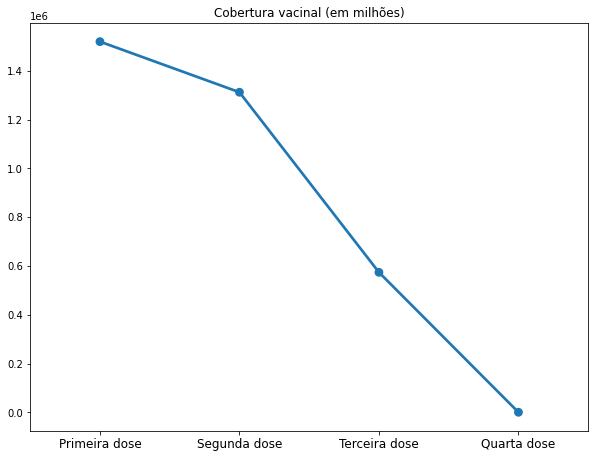

In [70]:
umaDose = dt.loc[data['dose'] == 1]
qtdRecebUmaDose = umaDose.count()[0]
duasDoses = dt.loc[data['dose'] == 2]
qtdRecebDuasDoses = duasDoses.count()[0]
tresDoses = dt.loc[data['dose'] == 3]
qtdRecebTresDoses = tresDoses.count()[0]
quatroDoses = dt.loc[data['dose'] == 4]
qtdRecebQuatroDoses = quatroDoses.count()[0]

labels = ['Primeira dose', 'Segunda dose', 'Terceira dose', 'Quarta dose']
values = [qtdRecebUmaDose,qtdRecebDuasDoses, qtdRecebTresDoses,qtdRecebQuatroDoses ]

fig, ax = plt.subplots(figsize=(10, 7.5))
sns.pointplot(data=data, x=labels, y=values)
ax.set_title('Cobertura vacinal (em milhões)')
plt.show()

A partir da visualização e análise do gráfico gerado é possível notar um decaimento na cobertura vacinal conforme as sucessivas doses foram surgindo. Tal dado pode ser considerado preocupante, visto que o normal seria a linha se manter "reta" e estável o que significaria uma alta adesão popular às aplicações das doses, algo que não aconteceu na prática. 

# Análise da quantidade de doses aplicadas separadamente (1°- 4°)


Primeiro, será necessário fazer a ordenação dos nomes dos vacinados e do número das doses aplicadas nos mesmos. Ao fazer isso é possível perceber uma repetição nos nomes, visto que o paciente pode ter tomado mais de uma dose. Porém, para essa análise não queremos a repetição de dados, uma vez que desejamos apenas a última dose tomada pelo paciente.

In [71]:
order = dt.sort_values(by=['nome'])
order

,nome,dose
1839873,?ENI FERREIRA BARBOSA,3.0
1839874,?ENI FERREIRA BARBOSA,2.0
1839875,?ENI FERREIRA BARBOSA,1.0
1351764,?VO ANTONIO LIBERATO DA SILVA,2.0
1351763,?VO ANTONIO LIBERATO DA SILVA,1.0
...,...,...
3235450,ÚRSULA MORAES MARINHO DE ALBUQUERQUE,1.0
3235456,ÚRSULA MYRTES NASCIMENTO GOMES,3.0
3235455,ÚRSULA MYRTES NASCIMENTO GOMES,2.0
3235454,ÚRSULA MYRTES NASCIMENTO GOMES,1.0


Agora realizaremos a filtragem dos dados a fim de obtermos apenas o necessário.

In [72]:
filtered = order.drop_duplicates(subset='nome', keep='last')


Separação e organização dos dados.

In [73]:
uma_dose = filtered['dose'] == 1
duas_doses = filtered['dose'] == 2
tres_doses = filtered['dose'] == 3
quatro_doses = filtered['dose'] == 4

# Visualização dos Dados

A visualização dos dados se dará em um gráfico circular, mais conhecido com "pizza", pois se torna mais fácil a observação e separação das informações.

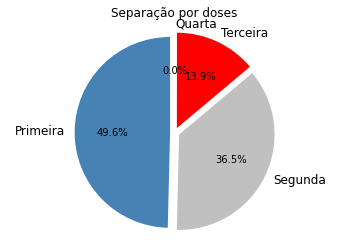

In [66]:
qtd_uma = filtered[uma_dose].count()[0]
qtd_duas = filtered[duas_doses].count()[0]
qtd_tres = filtered[tres_doses].count()[0]
qtd_quatro = filtered[quatro_doses].count()[0]

valores = [qtd_uma, qtd_duas, qtd_tres, qtd_quatro]
rotulos = ['Primeira', 'Segunda', 'Terceira', 'Quarta']

fig1, ax1 = plt.subplots()
plt.rcParams['xtick.labelsize'] = 12
ax1.pie(x=valores, labels=rotulos, autopct='%1.1f%%', shadow=False, startangle=90, colors = ['steelblue', 'silver','red', 'pink'], explode=(0.05, 0.05, 0.05, 0.05))
plt.title('Separação por doses')
ax1.axis('equal')
plt.show()

# Conclusão

Conclui-se que o número de doses da vacina contra a Covid-19 aplicadas durante a pandemia, no município de Recife-PE, se mostrou decadente. Isso se deu, possivelmente, por causa da retração da doença após as aplicações das primeiras e segundas doses, que fez com que os cidadãos julgassem não ser necessária a aplicação de uma terceira ou quarta dose. 